# **Data Cleaning Notebook**

## Objectives

*   Evaluate missing data
*   Clean data
*   Explore whether the `['description']` variable is truncated

## Inputs

*   VineFind_v1\outputs\datasets\collection\wine_reviews_collected.csv

## Outputs

*   Generate cleaned Train and Test sets, both saved under VineFind_v1/outputs/datasets/cleaned

## Conclusions

 
  * Data Cleaning Pipeline
  *Drop Variables:  `['customerID', 'TotalCharges' ]`*


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [24]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\purpk\\OneDrive\\Documents\\Coding\\VineFind\\VineFind\\VineFind_v1'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [25]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [26]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\purpk\\OneDrive\\Documents\\Coding\\VineFind\\VineFind'

# Imports packages

In [5]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import webbrowser

c:\Users\purpk\OneDrive\Documents\Coding\VineFind\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Section 1: Import Data

Section 1 content

In [6]:
df = pd.read_csv(f"outputs/datasets/collection/wine_reviews_collected.csv", dtype={11: str, 12: str, 13: str})
df.head(1)

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   

         designation  points  price    province     region_1 region_2  \
0  Martha's Vineyard      96  235.0  California  Napa Valley     Napa   

              variety winery taster_name taster_twitter_handle title  
0  Cabernet Sauvignon  Heitz         NaN                   NaN   NaN

# Section 2: Data Cleaning

#### Remove ['unnamed'] feature

In [7]:
df = df.drop(columns=["Unnamed: 0"])
df.head(1)

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   

         designation  points  price    province     region_1 region_2  \
0  Martha's Vineyard      96  235.0  California  Napa Valley     Napa   

              variety winery taster_name taster_twitter_handle title  
0  Cabernet Sauvignon  Heitz         NaN                   NaN   NaN

### Drop duplicates from the dataset 

In [8]:
df.drop_duplicates(subset=['description'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169430 entries, 0 to 169429
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                169370 non-null  object 
 1   description            169430 non-null  object 
 2   designation            119363 non-null  object 
 3   points                 169430 non-null  int64  
 4   price                  156609 non-null  float64
 5   province               169370 non-null  object 
 6   region_1               141517 non-null  object 
 7   region_2               67516 non-null   object 
 8   variety                169429 non-null  object 
 9   winery                 169430 non-null  object 
 10  taster_name            62354 non-null   object 
 11  taster_twitter_handle  59291 non-null   object 
 12  title                  71609 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 16.8+ MB


### Data type conversion

In [9]:
columns_to_change = {"country", "description", "designation", "province", "region_1", "region_2", "variety", "winery", "taster_name", "taster_twitter_handle", "title"}

for col in columns_to_change:
    if col in df.columns:
        df[col] = df[col].astype('string')

    else:
        print(f"Column {col} not found in DataFrame.")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169430 entries, 0 to 169429
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                169370 non-null  string 
 1   description            169430 non-null  string 
 2   designation            119363 non-null  string 
 3   points                 169430 non-null  int64  
 4   price                  156609 non-null  float64
 5   province               169370 non-null  string 
 6   region_1               141517 non-null  string 
 7   region_2               67516 non-null   string 
 8   variety                169429 non-null  string 
 9   winery                 169430 non-null  string 
 10  taster_name            62354 non-null   string 
 11  taster_twitter_handle  59291 non-null   string 
 12  title                  71609 non-null   string 
dtypes: float64(1), int64(1), string(11)
memory usage: 16.8 MB


# Section 2: Explore Data Analysis

### Describe data

In [10]:
df.describe(include="all")

country                                        description designation  \
count   169370                                             169430      119363   
unique      50                                             169430       47223   
top         US  This tremendous 100% varietal wine hails from ...     Reserve   
freq     70840                                                  1        2851   
mean       NaN                                                NaN         NaN   
std        NaN                                                NaN         NaN   
min        NaN                                                NaN         NaN   
25%        NaN                                                NaN         NaN   
50%        NaN                                                NaN         NaN   
75%        NaN                                                NaN         NaN   
max        NaN                                                NaN         NaN   

               points          price    province     region_1       region_2  \
count   169430.000000  156609.000000      169370       141517          67516   
unique            NaN            NaN         490         1332             18   
top               NaN            NaN  California  Napa Valley  Central Coast   
freq              NaN            NaN       48679         6420          14623   
mean        88.243192      34.642109         NaN          NaN            NaN   
std          3.144836      39.378969         NaN          NaN            NaN   
min         80.000000       4.000000         NaN          NaN            NaN   
25%         86.000000      16.000000         NaN          NaN            NaN   
50%         88.000000      25.000000         NaN          NaN            NaN   
75%         90.000000      40.000000         NaN          NaN            NaN   
max        100.000000    3300.000000         NaN          NaN            NaN   

           variety           winery taster_name taster_twitter_handle  \
count       169429           169430       62354                 59291   
unique         756            19180          19                    15   
top     Pinot Noir  Williams Selyem  Roger Voss            @vossroger   
freq         16651              301       14603                 14603   
mean           NaN              NaN         NaN                   NaN   
std            NaN              NaN         NaN                   NaN   
min            NaN              NaN         NaN                   NaN   
25%            NaN              NaN         NaN                   NaN   
50%            NaN              NaN         NaN                   NaN   
75%            NaN              NaN         NaN                   NaN   
max            NaN              NaN         NaN                   NaN   

                                                    title  
count                                               71609  
unique                                              71035  
top     Gloria Ferrer NV Blanc de Noirs Sparkling (Car...  
freq                                                    5  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Examine missing data

In [11]:
df.isnull().sum()

country                      60
description                   0
designation               50067
points                        0
price                     12821
province                     60
region_1                  27913
region_2                 101914
variety                       1
winery                        0
taster_name              107076
taster_twitter_handle    110139
title                     97821
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169430 entries, 0 to 169429
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                169370 non-null  string 
 1   description            169430 non-null  string 
 2   designation            119363 non-null  string 
 3   points                 169430 non-null  int64  
 4   price                  156609 non-null  float64
 5   province               169370 non-null  string 
 6   region_1               141517 non-null  string 
 7   region_2               67516 non-null   string 
 8   variety                169429 non-null  string 
 9   winery                 169430 non-null  string 
 10  taster_name            62354 non-null   string 
 11  taster_twitter_handle  59291 non-null   string 
 12  title                  71609 non-null   string 
dtypes: float64(1), int64(1), string(11)
memory usage: 16.8 MB


### Changing dtypes 

---

# Missing Values

Check for missing data

In [13]:
df.isnull().sum()

country                      60
description                   0
designation               50067
points                        0
price                     12821
province                     60
region_1                  27913
region_2                 101914
variety                       1
winery                        0
taster_name              107076
taster_twitter_handle    110139
title                     97821
dtype: int64

## Remove all missing data
Check the data size if all missing values are removed

### Visualize Missing Values

<Axes: >

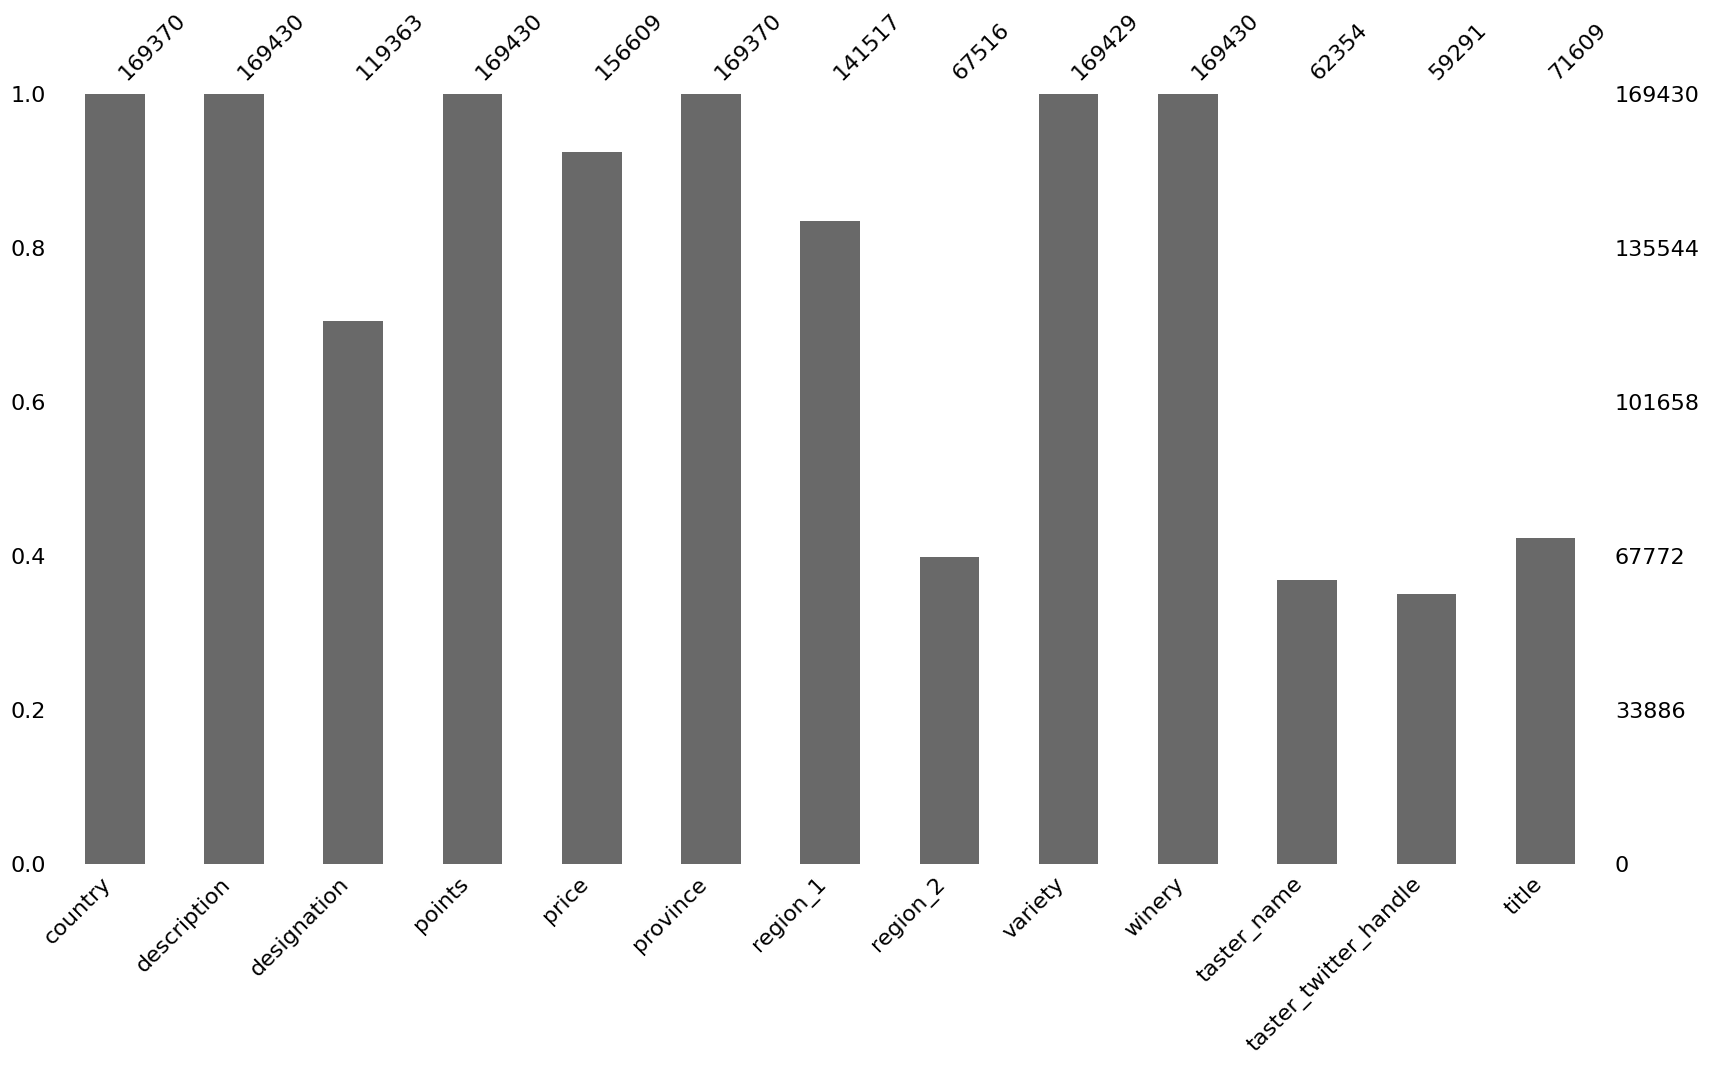

In [14]:
import missingno as msno
msno.bar(df, figsize=(20, 10))
# msno.heatmap(df, figsize=(20, 10))
# df.describe()

<Axes: >

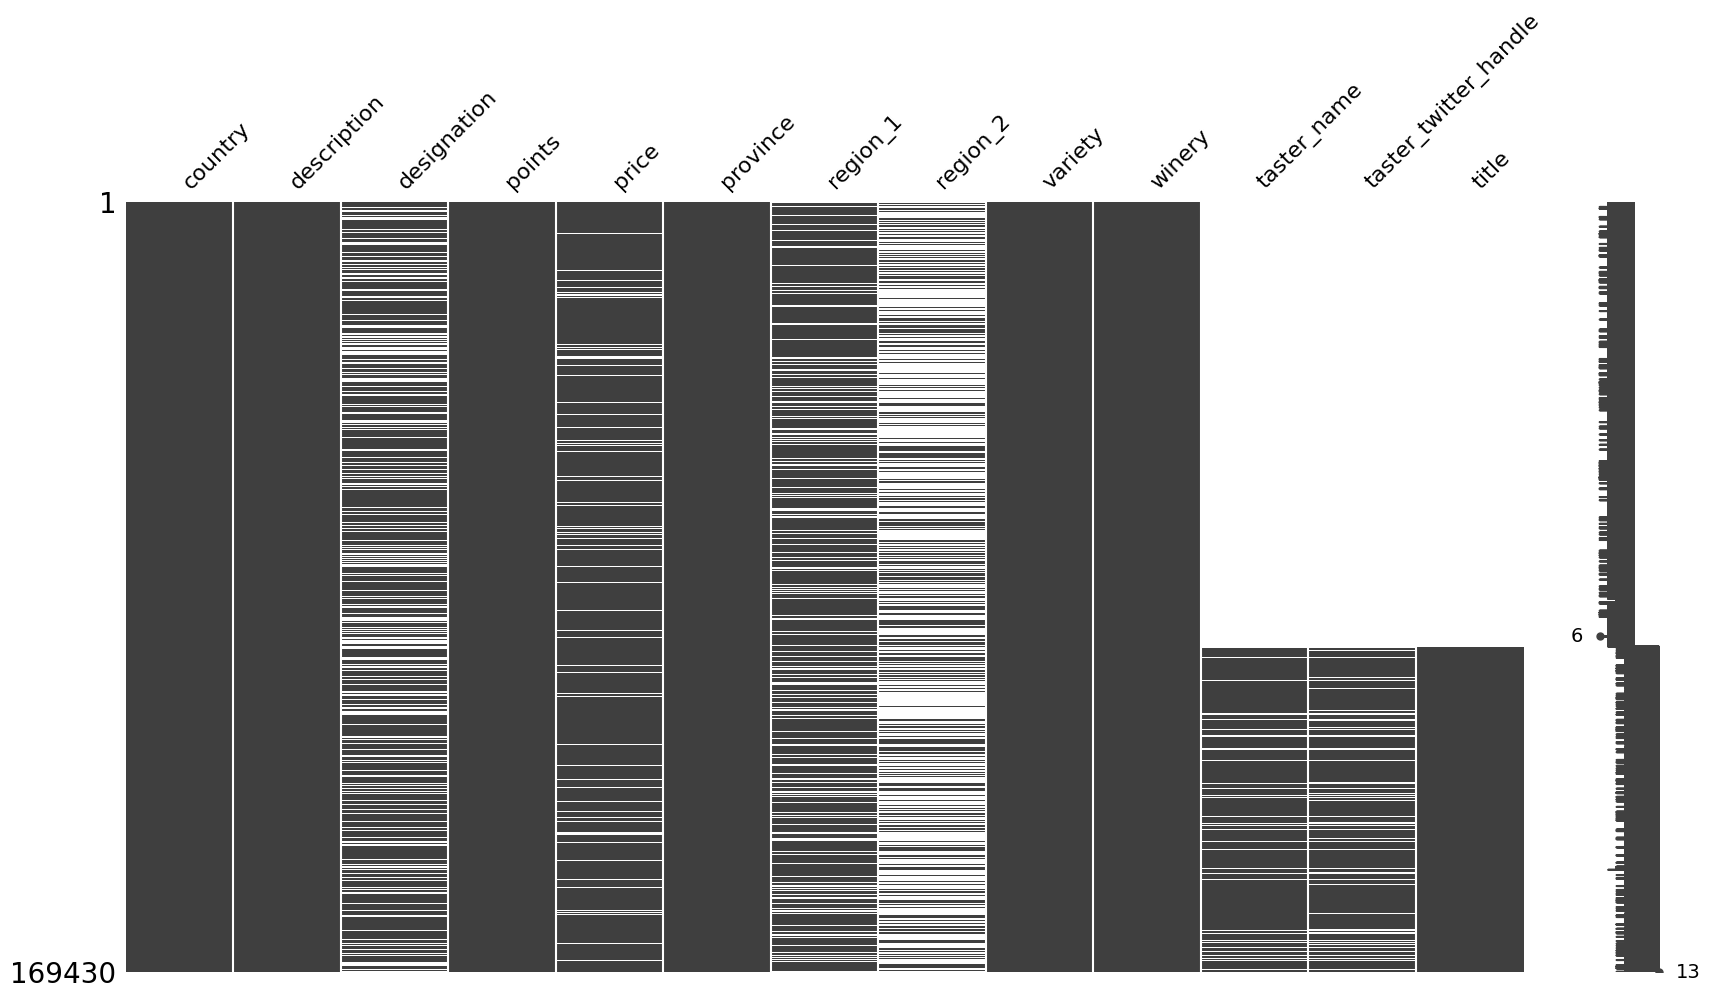

In [15]:
msno.matrix(df, figsize=(20, 10))

<Axes: >

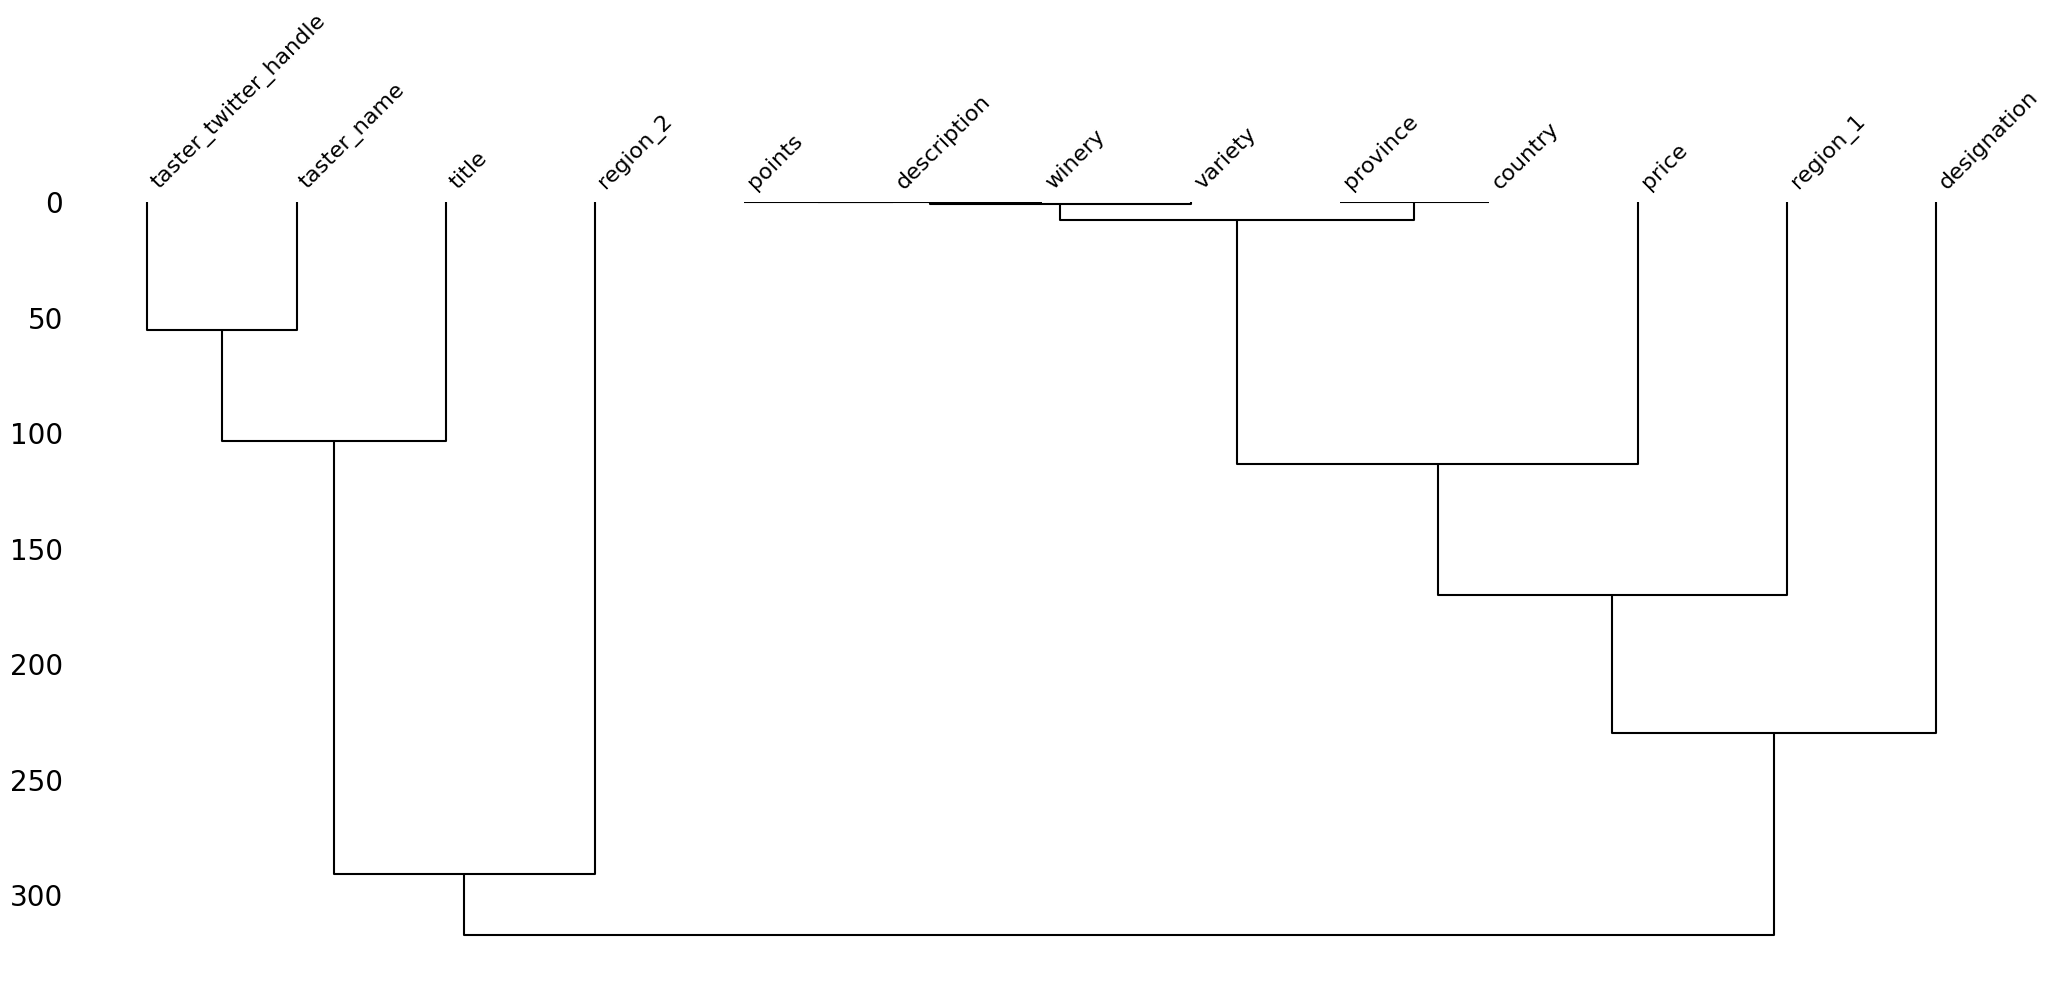

In [16]:
msno.dendrogram(df)

---

## Visulaize text

In [17]:
description = df['description']
text = " ".join(description.astype(str))

def plot_wordcloud(wordcloud):
    plt.figure(figsize=(15, 10))
    plt.axis("off")
    plt.imshow(wordcloud) 
    plt.show()

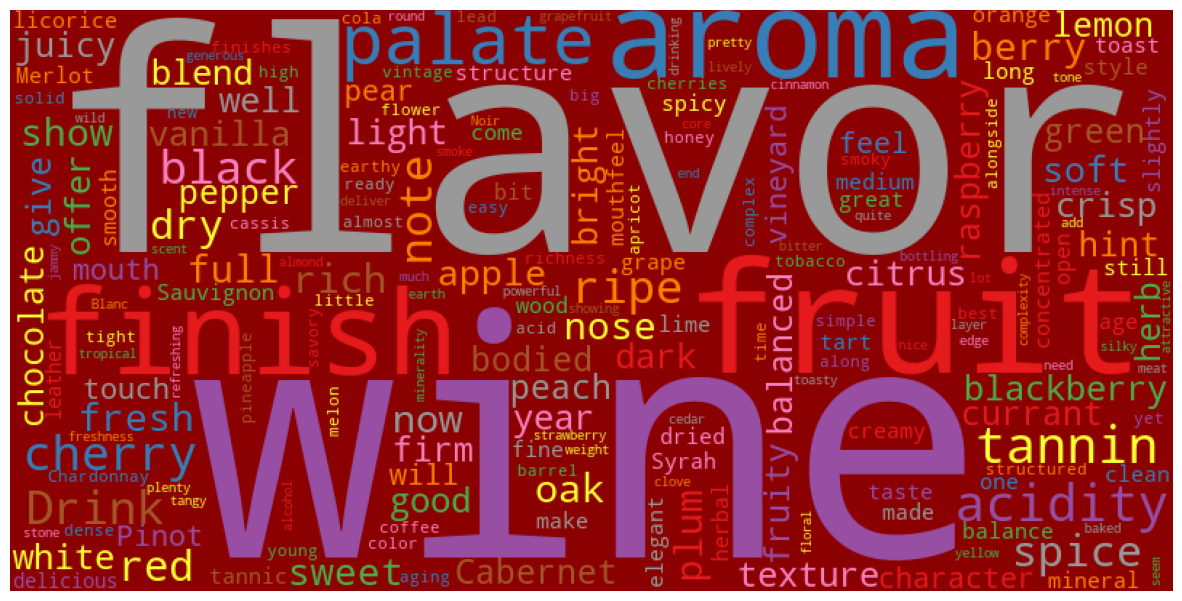

In [18]:
#from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color='darkred', colormap='Set1',
                      collocations = False, stopwords = STOPWORDS).generate(text)

plot_wordcloud(wordcloud)

#### Other Columns

Wordcloud for: designation


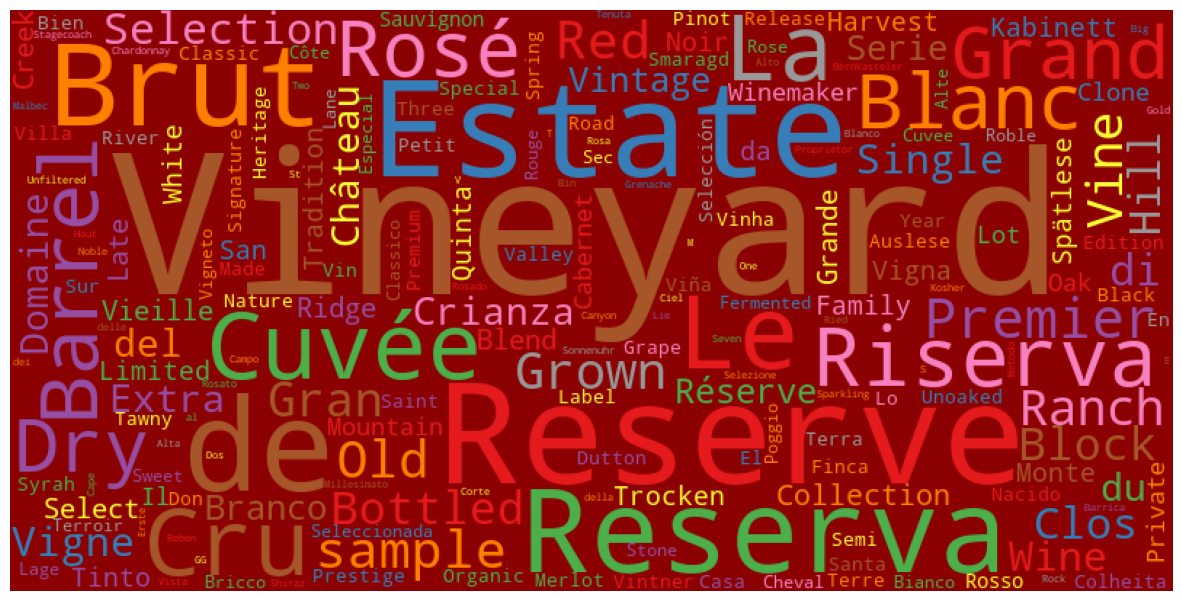

Wordcloud for: province


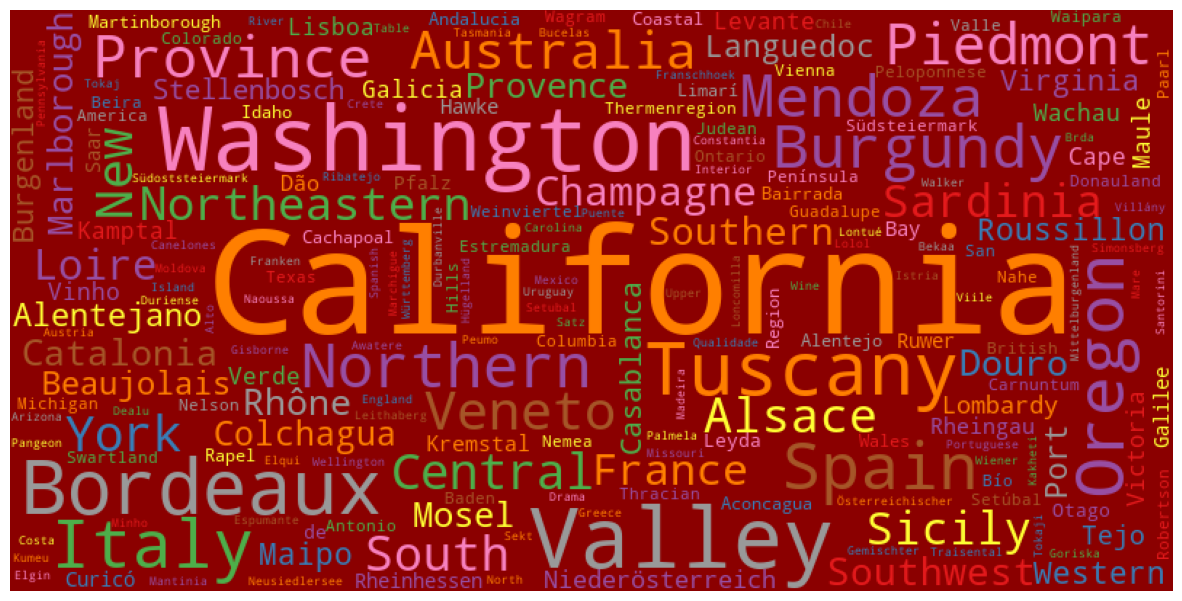

Wordcloud for: region_1


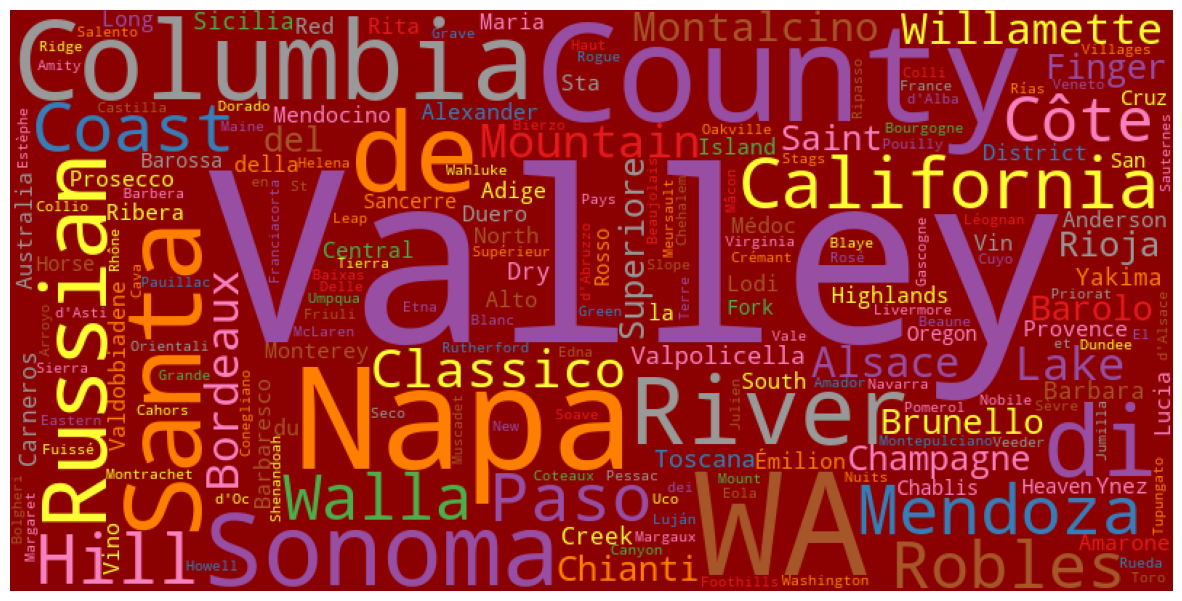

Wordcloud for: variety


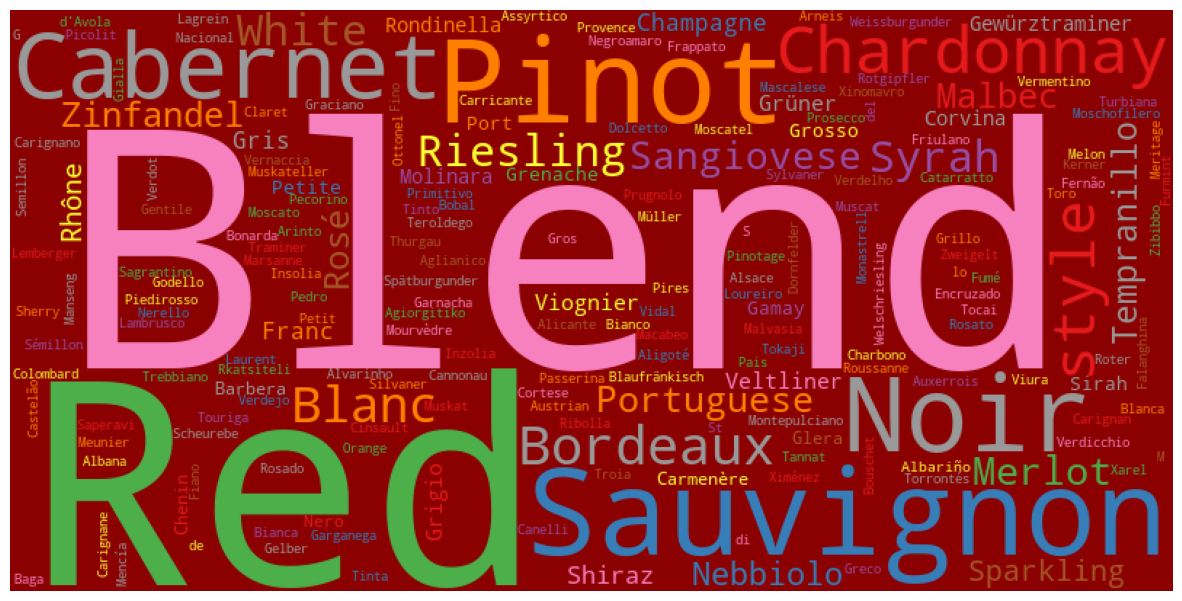

Wordcloud for: winery


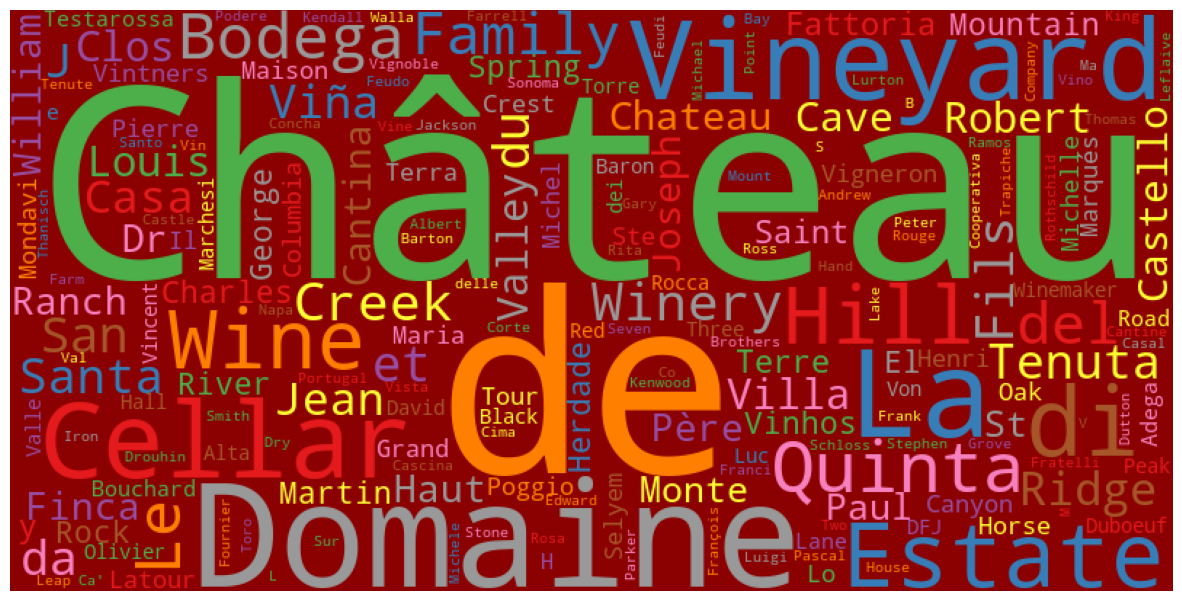

Wordcloud for: title


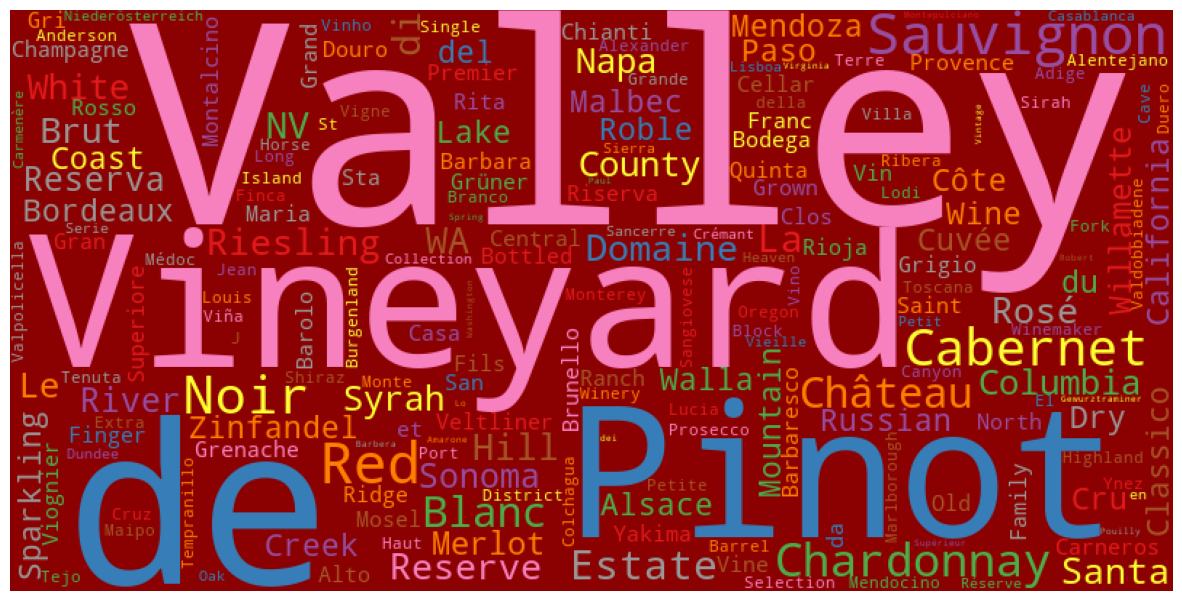

In [19]:
text_columns = ['designation', 'province', 'region_1', 'variety', 'winery', 'title']

# Only keep columns that exist in df
existing_text_columns = [col for col in text_columns if col in df.columns]

for col in existing_text_columns:
    # Drop missing values and join all text
    text = " ".join(df[col].dropna().astype(str))
    # Generate wordcloud WITHOUT removing stopwords
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='darkred', colormap='Set1',
                         collocations=False).generate(text)
    print(f"Wordcloud for: {col}")
    plot_wordcloud(wordcloud)

## Missing data profiling report

create directory for the profile


In [27]:
if not os.path.exists('VineFind_v1/outputs/reports'):
    os.makedirs('VineFind_v1/outputs/reports')
else:
    print("Directory already exists.")

In [30]:
vars_with_missing_data = df.columns[df.isnull().any()].tolist()
print(vars_with_missing_data)

report_path = "VineFind_v1/outputs/reports/missing_profile_report.html"

if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_file(report_path)
    abs_report_path = os.path.abspath(report_path)
    webbrowser.open(f"file:///{abs_report_path}")
else:
    print("There are no variables with missing data")

['country', 'designation', 'price', 'province', 'region_1', 'region_2', 'variety', 'taster_name', 'taster_twitter_handle', 'title']


c:\Users\purpk\OneDrive\Documents\Coding\VineFind\.venv\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


# Understanding the data

### Unique data

In [ ]:
def unique_summary(df, column):
    print(f"Number of unique values in '{column}':", pd.unique(df[column]).shape[0])
    print(f"\nTop 10 most frequent values in '{column}':")
    print(df[column].value_counts().head(10))

columns_to_check = ['country', 'province', 'variety']

for col in columns_to_check:
    unique_summary(df, col)

Number of unique values in 'country': 51

Top 10 most frequent values in 'country':
country
US           70840
France       27161
Italy        24990
Spain         8811
Portugal      6913
Chile         6132
Argentina     5463
Australia     4390
Austria       3963
Germany       2795
Name: count, dtype: Int64
Number of unique values in 'province': 491

Top 10 most frequent values in 'province':
province
California          48679
Washington          11320
Bordeaux             7710
Tuscany              7457
Oregon               6066
Northern Spain       5162
Burgundy             4963
Mendoza Province     4655
Piedmont             4434
Veneto               3867
Name: count, dtype: Int64
Number of unique values in 'variety': 757

Top 10 most frequent values in 'variety':
variety
Pinot Noir                  16651
Chardonnay                  15625
Cabernet Sauvignon          13262
Red Blend                   11214
Bordeaux-style Red Blend     8997
Sauvignon Blanc              6803
Riesling     

In [ ]:
def unique_value_counts_df(df):
    return pd.DataFrame({
        'column': df.columns,
        'unique_count': [df[col].nunique(dropna=False) for col in df.columns]
    })


unique_counts = unique_value_counts_df(df)
print(unique_counts)

                   column  unique_count
0                 country            51
1             description        169430
2             designation         47224
3                  points            21
4                   price           416
5                province           491
6                region_1          1333
7                region_2            19
8                 variety           757
9                  winery         19180
10            taster_name            20
11  taster_twitter_handle            16
12                  title         71036


In [ ]:
df_unique = df.drop_duplicates(subset=['description'], keep='first')
df = df_unique

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169430 entries, 0 to 169429
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                169370 non-null  string 
 1   description            169430 non-null  string 
 2   designation            119363 non-null  string 
 3   points                 169430 non-null  int64  
 4   price                  156609 non-null  float64
 5   province               169370 non-null  string 
 6   region_1               141517 non-null  string 
 7   region_2               67516 non-null   string 
 8   variety                169429 non-null  string 
 9   winery                 169430 non-null  string 
 10  taster_name            62354 non-null   string 
 11  taster_twitter_handle  59291 non-null   string 
 12  title                  71609 non-null   string 
dtypes: float64(1), int64(1), string(11)
memory usage: 16.8 MB


In [ ]:
pd.unique(df['country']).shape[0]
df['country'].value_counts().head(10)

country
US           70840
France       27161
Italy        24990
Spain         8811
Portugal      6913
Chile         6132
Argentina     5463
Australia     4390
Austria       3963
Germany       2795
Name: count, dtype: Int64

---

# Isolate desciption as a dataframe

In [ ]:
description = df['description']
description[4]

'This is the top wine from La Bégude, named after the highest point in the vineyard at 1200 feet. It has structure, density and considerable acidity that is still calming down. With 18 months in wood, the wine has developing an extra richness and concentration. Produced by the Tari family, formerly of Château Giscours in Margaux, it is a wine made for aging. Drink from 2020.'

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    os.makedirs('VineFind_v1/outputs/reports', exist_ok=True)
except Exception as e:
    print(e)
